In [22]:
import sys
sys.path.append("../Theory/")

from units import *
import matplotlib.pyplot as plt
from astrometry_sim import QuasarSim
import healpy as hp
from pylab import cm as cmaps
from estimator_wholesky import get_vector_alm
from tqdm import *
from astropy import units as u
from pylab import rcParams
import matplotlib as mpl
from subhalo_sim import SubhaloSample

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
sim = SubhaloSample()

sim.set_mass_distribution(sim.rho_M_SI, M_min=1e7*M_s, M_max=1e10*M_s, M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=1000, alpha=-1.9)
sim.set_radial_distribution(sim.r2rho_V_ein_EAQ, R_min=1e-3*kpc, R_max=260*kpc)
sim.set_subhalo_properties(sim.c200_SCP, distdep=False)

sim.get_sh_sample()


Simulating 8015 subhalos between 10000000.0 and 10000000000.0


In [57]:
v_b = sim.coords_galactic.pm_b.value*1e-3*asctorad*sim.coords_galactic.distance.value*(kpc/Year)/(Kmps)

In [58]:
v_l = sim.coords_galactic.pm_l_cosb.value*1e-3*asctorad*sim.coords_galactic.distance.value*(kpc/Year)/(Kmps)

In [59]:
v_t = np.sqrt(v_b**2 + v_l**2)

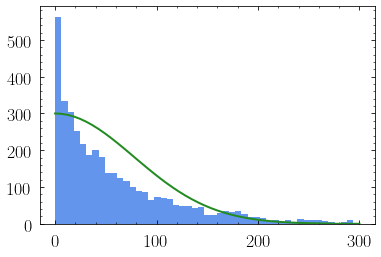

In [70]:
v_ary = np.linspace(0,300,50)
plt.hist(v_b, bins=v_ary, density=False);
rho_v_SHM_scalar = sim.rho_v_SHM_scalar((2*v_ary)*Kmps)
plt.plot(v_ary, 300*rho_v_SHM_scalar)

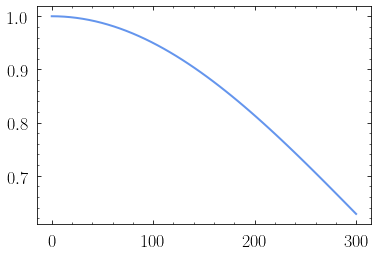

In [42]:
rho_v_SHM_scalar = sim.rho_v_SHM_scalar(v_ary*Kmps)
plt.plot(v_ary, rho_v_SHM_scalar)

In [72]:
(2/np.sqrt(2))**2

1.9999999999999996